<a href="https://colab.research.google.com/github/raviteja1432/AI/blob/main/chronickidneyusingANNCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.layers import Dropout

In [2]:
data= pd.read_csv('/content/drive/MyDrive/majorcnnimages/kidney_disease.csv')

In [3]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [4]:
print(data)

      id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1    

In [5]:
print(data.shape)
print(data.ndim)

(400, 26)
2


In [6]:
print(data.describe())

               id         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    199.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000  
mean   148.036517   57.425722    3.072454  137.528754    4.627244   12.526437  
std     79.281714   50.503006 

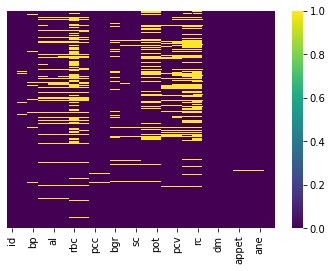

In [7]:
sns.heatmap(data.isnull(),yticklabels = False, cmap='viridis');

In [8]:
data = data.dropna(axis = 0)

In [9]:
print(data.shape)

(158, 26)


In [10]:
for column in data.columns:
    if data[column].dtype == np.number:
        continue
    data[column] = LabelEncoder().fit_transform(data[column]) 

<ipython-input-10-bee7a5f43d56>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:


In [11]:
print(data.shape)
print(data.head())

(158, 26)
    id   age    bp     sg   al   su  rbc  pc  pcc  ba  ...  pcv  wc  rc  htn  \
3    0  48.0  70.0  1.005  4.0  0.0    1   0    1   0  ...   11  42  14    1   
9    1  53.0  90.0  1.020  2.0  0.0    0   0    1   0  ...    8  11  12    1   
11   2  63.0  70.0  1.010  3.0  0.0    0   0    1   0  ...   11  25  13    1   
14   3  68.0  80.0  1.010  3.0  2.0    1   0    1   1  ...    0   8   2    1   
20   4  61.0  80.0  1.015  2.0  0.0    0   0    0   0  ...    4  63   7    1   

    dm  cad  appet  pe  ane  classification  
3    0    0      1   1    1               0  
9    1    0      1   0    1               0  
11   1    0      1   1    0               0  
14   1    1      1   1    0               0  
20   1    1      1   1    1               0  

[5 rows x 26 columns]


In [12]:
print(data.describe())

               id         age          bp          sg          al          su  \
count  158.000000  158.000000  158.000000  158.000000  158.000000  158.000000   
mean    78.500000   49.563291   74.050633    1.019873    0.797468    0.253165   
std     45.754781   15.512244   11.175381    0.005499    1.413130    0.813397   
min      0.000000    6.000000   50.000000    1.005000    0.000000    0.000000   
25%     39.250000   39.250000   60.000000    1.020000    0.000000    0.000000   
50%     78.500000   50.500000   80.000000    1.020000    0.000000    0.000000   
75%    117.750000   60.000000   80.000000    1.025000    1.000000    0.000000   
max    157.000000   83.000000  110.000000    1.025000    4.000000    5.000000   

              rbc          pc         pcc          ba  ...         pcv  \
count  158.000000  158.000000  158.000000  158.000000  ...  158.000000   
mean     0.886076    0.816456    0.088608    0.075949  ...   20.569620   
std      0.318729    0.388343    0.285080    0.2

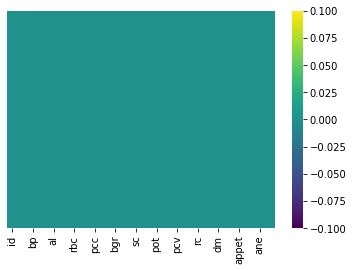

In [13]:
sns.heatmap(data.isnull(),yticklabels = False, cmap='viridis');

In [14]:
X = data.drop(['classification'],axis=1)
Y = data['classification']

In [15]:

X=X.drop(['age'],axis=1)

In [16]:
X=X.drop(['id'],axis=1)

In [17]:
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [18]:
print(X)

           bp    sg    al   su  rbc   pc  pcc   ba       bgr        bu  ...  \
3    0.333333  0.00  1.00  0.0  1.0  0.0  1.0  0.0  0.111905  0.153846  ...   
9    0.666667  0.75  0.50  0.0  0.0  0.0  1.0  0.0  0.000000  0.324415  ...   
11   0.333333  0.25  0.75  0.0  0.0  0.0  1.0  0.0  0.738095  0.167224  ...   
14   0.500000  0.25  0.75  0.4  1.0  0.0  1.0  1.0  0.207143  0.267559  ...   
20   0.500000  0.50  0.50  0.0  0.0  0.0  0.0  0.0  0.245238  0.461538  ...   
..        ...   ...   ...  ...  ...  ...  ...  ...       ...       ...  ...   
395  0.500000  0.75  0.00  0.0  1.0  1.0  0.0  0.0  0.166667  0.130435  ...   
396  0.333333  1.00  0.00  0.0  1.0  1.0  0.0  0.0  0.011905  0.070234  ...   
397  0.500000  0.75  0.00  0.0  1.0  1.0  0.0  0.0  0.071429  0.053512  ...   
398  0.166667  1.00  0.00  0.0  1.0  1.0  0.0  0.0  0.104762  0.133779  ...   
399  0.500000  1.00  0.00  0.0  1.0  1.0  0.0  0.0  0.145238  0.026756  ...   

         hemo       pcv        wc     rc  htn   dm 

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2 ,shuffle = True)

In [22]:
model = Sequential()

#first layer
model.add(Dense(15,input_dim= len(X.columns),kernel_initializer= k.initializers.random_normal(seed= 13),activation= 'relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(16,activation= 'relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense (1, activation = 'sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 15)                360       
                                                                 
 dropout_3 (Dropout)         (None, 15)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                256       
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 64)                2112      
                                                                 
 dropout_5 (Dropout)         (None, 64)               

In [23]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [25]:
history = model.fit(X_train, Y_train, validation_data= (X_test, Y_test), batch_size=32,epochs=15,verbose=1)

Epoch 1/15
4/4 [==============================] - 1s 48ms/step - loss: 0.5080 - accuracy: 0.7381 - val_loss: 0.5029 - val_accuracy: 0.6875
Epoch 2/15
4/4 [==============================] - 0s 16ms/step - loss: 0.4677 - accuracy: 0.7460 - val_loss: 0.4573 - val_accuracy: 0.6875
Epoch 3/15
4/4 [==============================] - 0s 17ms/step - loss: 0.4343 - accuracy: 0.7540 - val_loss: 0.4134 - val_accuracy: 0.6875
Epoch 4/15
4/4 [==============================] - 0s 16ms/step - loss: 0.3940 - accuracy: 0.7937 - val_loss: 0.3721 - val_accuracy: 0.6875
Epoch 5/15
4/4 [==============================] - 0s 18ms/step - loss: 0.3407 - accuracy: 0.8333 - val_loss: 0.3317 - val_accuracy: 0.7188
Epoch 6/15
4/4 [==============================] - 0s 17ms/step - loss: 0.3218 - accuracy: 0.8175 - val_loss: 0.2897 - val_accuracy: 0.8125
Epoch 7/15
4/4 [==============================] - 0s 17ms/step - loss: 0.2911 - accuracy: 0.8730 - val_loss: 0.2491 - val_accuracy: 0.9062
Epoch 8/15
4/4 [===========

In [26]:
X_train.shape[1]

23

In [31]:
h=history.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
model.save('ckd.model');

In [27]:
model.save("paperANN.h5")

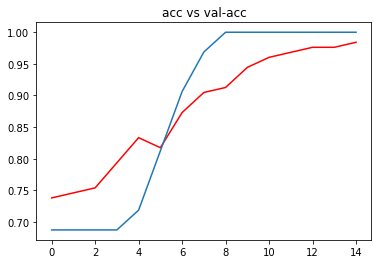

In [32]:
import matplotlib.pyplot as plt
plt.plot(h['accuracy'], c='red')
plt.plot(h['val_accuracy'])
plt.title("acc vs val-acc")
plt.show()

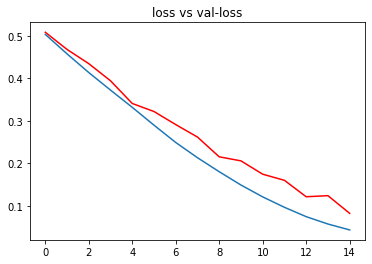

In [33]:
import matplotlib.pyplot as plt
plt.plot(h['loss'], c='red')
plt.plot(h['val_loss'])
plt.title("loss vs val-loss")
plt.show()

In [34]:
print("shape of training data: ",X_train.shape)
print("shape of test data: ",X_test.shape)

shape of training data:  (126, 23)
shape of test data:  (32, 23)


In [35]:
pred = model.predict(X_test)
pred = [1 if y>=0.5 else 0 for y in pred]

print('Original:  {0}'.format(",".join(str(x) for x in Y_test)))
print('Predicted: {0}'.format(",".join(str(x) for x in pred)))

1/1 [==============================] - 0s 99ms/step
Original:  0,0,1,1,0,1,1,1,0,1,0,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,1,1,1
Predicted: 0,0,1,1,0,1,1,1,0,1,0,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,1,1,1


In [36]:
print(X_test)

           bp    sg    al   su  rbc   pc  pcc   ba       bgr        bu  ...  \
76   0.500000  0.00  1.00  0.0  0.0  0.0  0.0  1.0  0.150000  0.431438  ...   
212  0.333333  0.50  0.75  0.8  1.0  1.0  0.0  0.0  0.435714  0.468227  ...   
252  0.500000  1.00  0.00  0.0  1.0  1.0  0.0  0.0  0.028571  0.130435  ...   
355  0.166667  0.75  0.00  0.0  1.0  1.0  0.0  0.0  0.059524  0.046823  ...   
48   0.333333  0.00  0.00  0.0  1.0  1.0  0.0  0.0  0.000000  0.073579  ...   
369  0.333333  0.75  0.00  0.0  1.0  1.0  0.0  0.0  0.088095  0.127090  ...   
376  0.333333  1.00  0.00  0.0  1.0  1.0  0.0  0.0  0.042857  0.020067  ...   
270  0.500000  1.00  0.00  0.0  1.0  1.0  0.0  0.0  0.097619  0.080268  ...   
210  0.833333  0.50  1.00  0.4  1.0  1.0  0.0  0.0  0.440476  0.408027  ...   
371  0.166667  1.00  0.00  0.0  1.0  1.0  0.0  0.0  0.021429  0.133779  ...   
171  0.333333  0.75  0.75  0.0  1.0  1.0  0.0  0.0  0.076190  0.167224  ...   
71   0.166667  0.25  0.25  0.0  1.0  1.0  0.0  0.0  

In [37]:
print(Y_test)

76     0
212    0
252    1
355    1
48     0
369    1
376    1
270    1
210    0
371    1
171    0
71     0
304    1
58     0
361    1
267    1
331    1
399    1
318    1
301    1
22     0
127    0
379    1
296    1
265    1
279    1
277    1
190    0
323    1
285    1
388    1
380    1
Name: classification, dtype: int64
